## Project Design Writeup

### Problem Statement 

Eating healthy is a challenge. Using the Epicurious "Recipes by Nutrition and Ratings," I would like to predict healthy recipes. 

### Hypothesis

Fat and Sodium Content will directly correlate with Calorie count. 

Certain ingredients will correlate with lower Calorie count 

### Goal

The goal of this project is to predict healthy recipes based on protein, sodium and fat. 

Secondary goal is to predict healthy recipes (lower calories) based on ingredients, ultimately coming up with a 10 ingredient list that count derive many different healthy recipes.


Option 1- 

### Risks

Research has proven that portion size has a strong influence on calorie count and health. There is no information on whether these are single person portion sizes but will make this
assumption that they are. 

## Exploratory Data Analysis 

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from pandas.tools.plotting import scatter_matrix
from sklearn import tree, ensemble, metrics, cross_validation, externals
from sklearn.preprocessing import MinMaxScaler
from sklearn import feature_selection, linear_model

In [40]:
df = pd.read_csv(('epi_r.csv'))

In [41]:
df

,title,rating,calories,protein,fat,...,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,...,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,...,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,...,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,...,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,...,0.0,0.0,0.0,0.0,0.0


## Basic Understand of Dataset

In [42]:
print df.head(5)
print df.info()
df.describe()

                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat   ...    cookbooks  leftovers  snack  snack week  turkey  
0   7.0   ...          0.0        0.0    0.0         0.0     1.0  
1  23.0   ...          0.0        0.0    0.0         0.0     0.0  
2   7.0   ...          0.0        0.0    0.0         0.0     0.0  
3   NaN   ...          0.0        0.0    0.0         0.0     0.0  
4  32.0   ...          0.0        0.0    0.0         0.0     0.0  

[5 rows x 680 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turk

,rating,calories,protein,fat,sodium,...,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,...,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,...,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000


##### Analysis/Insights

There are 680 columns!Most of them are ingredients that make up each recipe.The data is already laid out like dummies variables so no cleaning will be needed there. However, there are many columns that aren't ingredients, so I may wish to get rid of them for my analysis. I would also consider grouping ingredients (i.e. tomatoes, broccoli = vegetables)

In [43]:
df.columns

Index([u'title', u'rating', u'calories', u'protein', u'fat', u'sodium',
       u'#cakeweek', u'#wasteless', u'22-minute meals',
       u'3-ingredient recipes',
       ...
       u'yellow squash', u'yogurt', u'yonkers', u'yuca', u'zucchini',
       u'cookbooks', u'leftovers', u'snack', u'snack week', u'turkey'],
      dtype='object', length=680)

In [44]:
df.isnull().sum()

title                      0
rating                     0
calories                4117
protein                 4162
fat                     4183
sodium                  4119
#cakeweek                  0
#wasteless                 0
22-minute meals            0
3-ingredient recipes       0
                        ... 
yellow squash              0
yogurt                     0
yonkers                    0
yuca                       0
zucchini                   0
cookbooks                  0
leftovers                  0
snack                      0
snack week                 0
turkey                     0
dtype: int64

(array([ 1836.,     0.,   164.,   124.,     0.,   532.,  1489.,  5169.,
         8019.,  2719.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

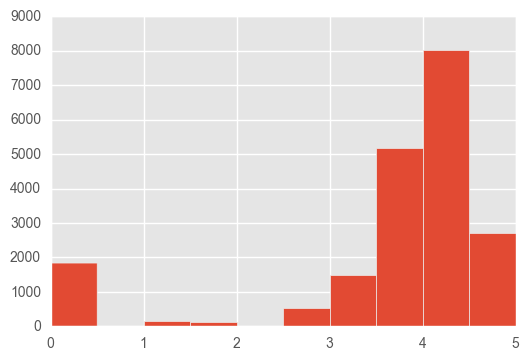

In [45]:
x = df.rating
y = df.title

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(x)


### Analysis/insight 

The majority of the ratings are above 3.0. It wouldn't be very interesting to do analysis of rating because the data is heavily skewed to the right.' 

Filter recipes with chicken

In [46]:
df[df.chicken == 1.0].count()

#There are 1,344 recipes in the dataset that include chicken

title                   1344
rating                  1344
calories                1049
protein                 1049
fat                     1049
sodium                  1049
#cakeweek               1344
#wasteless              1344
22-minute meals         1344
3-ingredient recipes    1344
                        ... 
yellow squash           1344
yogurt                  1344
yonkers                 1344
yuca                    1344
zucchini                1344
cookbooks               1344
leftovers               1344
snack                   1344
snack week              1344
turkey                  1344
dtype: int64

#### Create a for loop formula that will allow me to see which ingredient appears in the most number of recipes

### Calorie count
What is the calorie count for recipes at the various rating levels?
Hypothesis is that highly caloric foods will have high ratings 

In [47]:
#drop NAN values in calories, protein, sodium

#print df.info()
#drop_featureNA= df.dropna(subset=[['calories', 'protein', 'sodium']])
#print drop_featureNA.info()

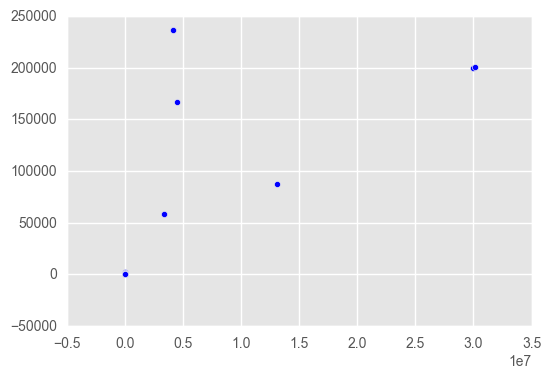

In [49]:
x = df.calories

y = df.protein

plt.scatter(x, y)
plt.show()

In [50]:
df.calories.describe().T

# why are there some with so many calories?

count    1.588800e+04
mean     6.341284e+03
std      3.595766e+05
min      0.000000e+00
25%      1.990000e+02
50%      3.320000e+02
75%      5.870000e+02
max      3.011122e+07
Name: calories, dtype: float64

In [51]:
df.describe()

,rating,calories,protein,fat,sodium,...,cookbooks,leftovers,snack,snack week,turkey
count,15888.00000,1.588800e+04,15888.000000,1.586400e+04,1.588800e+04,...,15888.000000,15888.000000,15888.000000,15888.000000,15888.000000
mean,3.75775,6.341284e+03,100.173401,3.469868e+02,6.243302e+03,...,0.000126,0.000315,0.001322,0.000818,0.021211
std,1.28968,3.595766e+05,3840.560082,2.045933e+04,3.337898e+05,...,0.011219,0.017738,0.036333,0.028594,0.144092
min,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.75000,1.990000e+02,3.000000,NaN,8.100000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.37500,3.320000e+02,8.000000,NaN,2.950000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.37500,5.870000e+02,27.000000,NaN,7.130000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.00000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:

#filling nan values with pseudo-average & 
#removing outliers ---- may not be best method, alternative is to drop nan rows
cal_clean = df.loc[df['calories'].notnull()]

q1  = cal_clean['calories'].quantile(.25)
q3  = cal_clean['calories'].quantile(.75)
iqr = q3 - q1

for i in df.columns[1:6]:
    df[i].fillna(cal_clean.loc[(cal_clean['calories'] > q1) & (df['calories'] < q3)][i].mean(), inplace=True)
    
df = df.loc[(df['calories'] > q1-(iqr*3)) & (df['calories'] < q3+(iqr*3))]


In [53]:
df.describe()

,rating,calories,protein,fat,sodium,...,cookbooks,leftovers,snack,snack week,turkey
count,15448.000000,15448.000000,15448.000000,15448.000000,15448.000000,...,15448.000000,15448.000000,15448.000000,15448.000000,15448.000000
mean,3.752873,416.428599,17.810073,23.101474,625.857263,...,0.000129,0.000324,0.001359,0.000842,0.020132
std,1.292164,316.718132,24.393513,22.753106,2752.882536,...,0.011378,0.017988,0.036846,0.028998,0.140457
min,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,195.000000,3.000000,7.000000,77.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,322.000000,8.000000,17.000000,278.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,556.000000,24.000000,31.000000,672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1750.000000,253.000000,166.000000,132220.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
df.sort_values('calories', ascending=False)

,title,rating,calories,protein,fat,...,cookbooks,leftovers,snack,snack week,turkey
4864,The Celtic Buck,3.750,1750.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0
1589,Beef Tenderloin and Vegetable Pot Pies,3.750,1750.0,79.0,135.000000,...,0.0,0.0,0.0,0.0,0.0
10288,Pâte Sucrée,3.125,1743.0,23.0,106.000000,...,0.0,0.0,0.0,0.0,0.0
11596,Balsamic Short Ribs,4.375,1742.0,66.0,146.000000,...,0.0,0.0,0.0,0.0,0.0
8294,Petit Trois's French Onion Soup,0.000,1740.0,159.0,84.000000,...,0.0,0.0,0.0,0.0,0.0
13848,Paella-Style Shellfish Pasta,3.750,1740.0,222.0,39.000000,...,0.0,0.0,0.0,0.0,0.0
12615,Japanese-Style Fried Rice (Chahan),0.000,1739.0,101.0,29.000000,...,0.0,0.0,0.0,0.0,0.0
8448,Grilled Hoisin-Marinated Butterflied Leg of Lamb,4.375,1737.0,148.0,115.000000,...,0.0,0.0,0.0,0.0,0.0
2578,Fried Chicken and Biscuits with Pink Peppercor...,3.125,1736.0,54.0,125.000000,...,0.0,0.0,0.0,0.0,0.0
8138,Falafel,0.000,1735.0,79.0,69.000000,...,0.0,0.0,0.0,0.0,0.0


          calories       fat   protein    sodium
calories  1.000000  0.881949  0.733874  0.144156
fat       0.881949  1.000000  0.597875  0.107681
protein   0.733874  0.597875  1.000000  0.205626
sodium    0.144156  0.107681  0.205626  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119BAAD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x129E8F70>]], dtype=object)

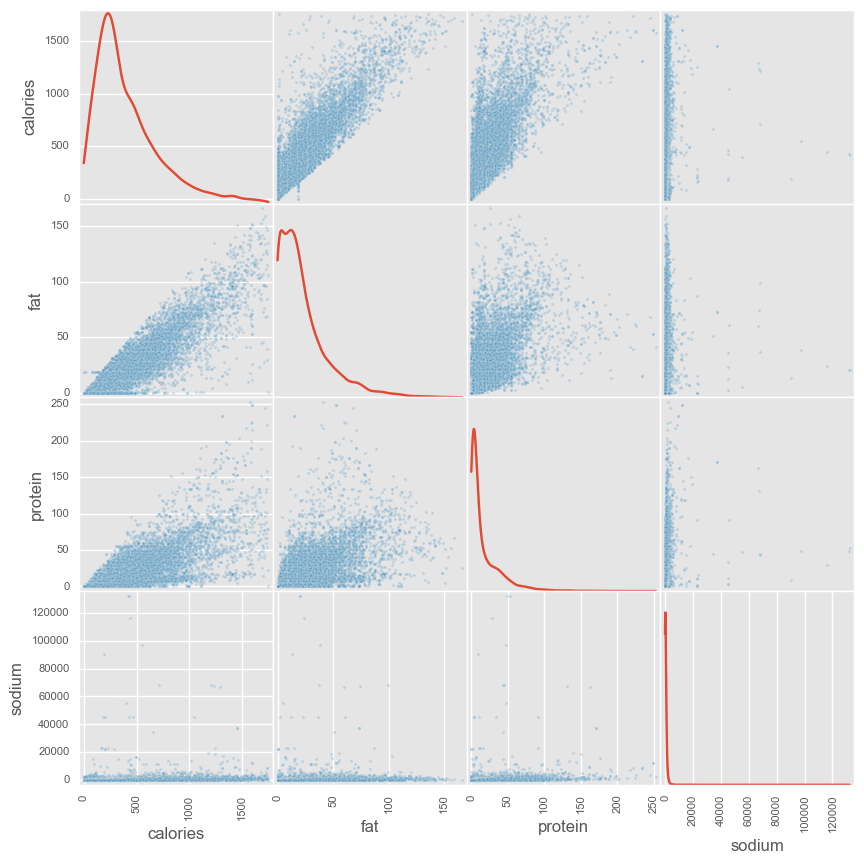

In [55]:
continuous_df = df[[
        'calories',
        'fat',
        'protein',
        'sodium']]

print continuous_df.corr()
scatter_matrix(continuous_df, alpha=0.2, figsize=(10, 10), diagonal='kde')

### Linear Regression 

In [89]:
model_protein = smf.ols(formula = 'calories ~ protein', data = df).fit()

model_protein.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                 1.803e+04
Date:                Tue, 21 Feb 2017   Prob (F-statistic):               0.00
Time:                        13:59:05   Log-Likelihood:            -1.0490e+05
No. Observations:               15448   AIC:                         2.098e+05
Df Residuals:                   15446   BIC:                         2.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    246.7271      2.143    115.114      0.000       242.526   250.928
protein        9.5284      0.071    134.269      0.000         9.389     9.667
==============================================================================
Omnibus:                     4211.616   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15716.987
Skew:                           1.329   Prob(JB):                         0.00
Kurtosis:                       7.165   Cond. No.                         37.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear Regression equation is Calories = 246.72 + 9.52 * protein. These coefficients are significantly different from 0 as they do not satisfy the following three criteria. : (a) t-values for these coefficients is far greater than 2; (b) the p-values are less than 2.5%; (c) the confidence intervals don't include 0.

With all held constant, every 1 protein increase there is a average 9.5 increase in calories in each recipe

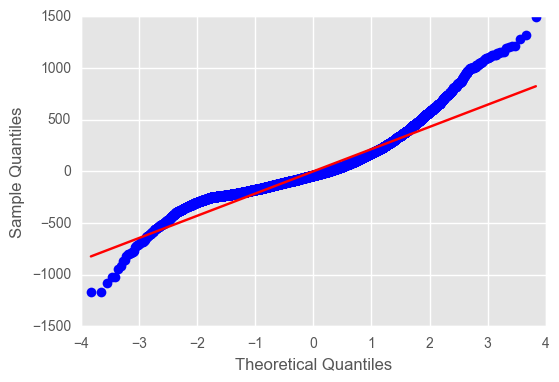

In [91]:
sm.qqplot(model_protein.resid, line = 's')

pass

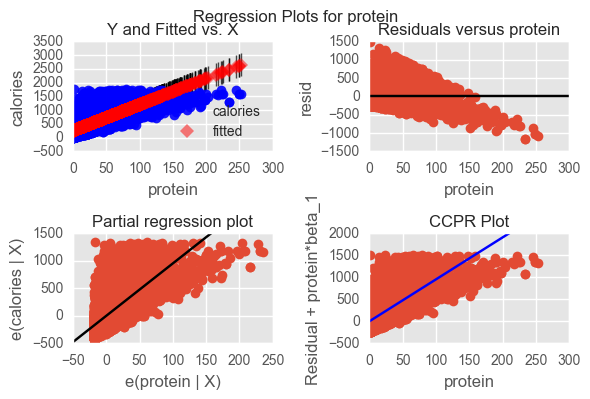

In [94]:
sm.graphics.plot_regress_exog(model_protein, 'protein')

pass

In [90]:
model_fat = smf.ols(formula = 'calories ~ fat', data = df).fit()

model_fat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 5.408e+04
Date:                Tue, 21 Feb 2017   Prob (F-statistic):               0.00
Time:                        13:59:08   Log-Likelihood:                -99250.
No. Observations:               15448   AIC:                         1.985e+05
Df Residuals:                   15446   BIC:                         1.985e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    132.8226      1.712     77.595      0.000       129.467   136.178
fat           12.2765      0.053    232.548      0.000        12.173    12.380
==============================================================================
Omnibus:                     6260.113   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46587.016
Skew:                           1.770   Prob(JB):                         0.00
Kurtosis:                      10.736   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

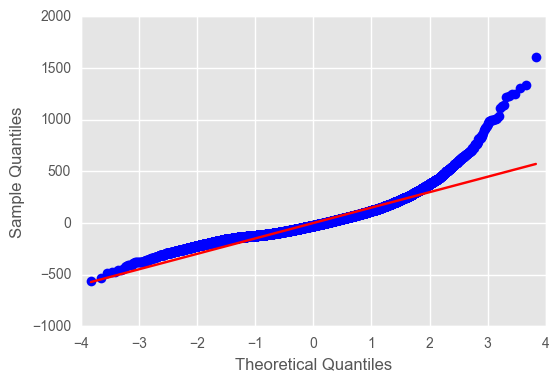

In [92]:
sm.qqplot(model_fat.resid, line = 's')

pass

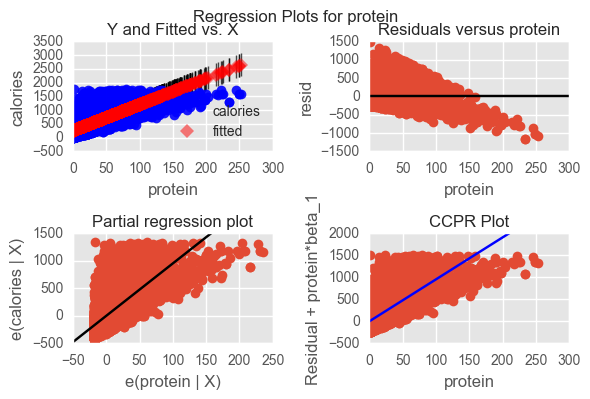

In [95]:
sm.graphics.plot_regress_exog(model_protein, 'protein')

pass

In [61]:
model = smf.ols(formula = 'calories ~ protein + fat', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 4.186e+04
Date:                Tue, 21 Feb 2017   Prob (F-statistic):               0.00
Time:                        12:13:47   Log-Likelihood:                -96506.
No. Observations:               15448   AIC:                         1.930e+05
Df Residuals:                   15445   BIC:                         1.930e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    120.2893      1.442     83.444      0.000       117.464   123.115
protein        4.1743      0.051     81.155      0.000         4.073     4.275
fat            9.6009      0.055    174.105      0.000         9.493     9.709
==============================================================================
Omnibus:                     7769.276   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80773.934
Skew:                           2.185   Prob(JB):                         0.00
Kurtosis:                      13.315   Cond. No.                         59.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model = smf.ols(formula = 'calories ~ protein + fat + sodium', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 2.791e+04
Date:                Tue, 21 Feb 2017   Prob (F-statistic):               0.00
Time:                        14:50:55   Log-Likelihood:                -96506.
No. Observations:               15448   AIC:                         1.930e+05
Df Residuals:                   15444   BIC:                         1.930e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    120.1757      1.445     83.191      0.000       117.344   123.007
protein        4.1630      0.052     79.656      0.000         4.061     4.265
fat            9.6022      0.055    174.098      0.000         9.494     9.710
sodium         0.0005      0.000      1.215      0.224        -0.000     0.001
==============================================================================
Omnibus:                     7767.188   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80713.815
Skew:                           2.184   Prob(JB):                         0.00
Kurtosis:                      13.311   Cond. No.                     4.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Multicollinarity was experienced when the third variable, sodium , was added.